<a href="https://colab.research.google.com/github/abdyraman/CryptoClustering/blob/main/Crypto_Clustering_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install holoviews hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.2.0
    Uninstalling bokeh-3.2.0:
      Successfully uninstalled bokeh-3.2.0


In [18]:
# Import required libraries and dependencies
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

import pandas as pd, numpy as np

idx = pd.date_range('1/1/2000', periods=1000)
df  = pd.DataFrame(np.random.randn(1000, 4), index=idx, columns=list('ABCD')).cumsum()

hvplot.show(df.hvplot())


Launching server at http://localhost:36759


In [19]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv('/content/crypto_market_data.csv', index_col="coin_id")

# Display sample data
df_market_data.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
iota,0.41996,6.06830,-3.77714,-4.15281,-34.51894,95.02821,-3.98533
wrapped-bitcoin,1.10231,7.40537,6.55668,7.37557,-3.58772,83.90520,37.53424
digibyte,2.97084,0.67038,-7.31941,13.25354,-31.09030,482.58918,184.38014
okb,-2.72700,-4.55389,-5.02662,-10.43847,-2.83120,39.95853,141.95791
binance-usd,-0.10642,0.04726,0.05902,0.01843,0.09383,0.09959,0.13928
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
cdai,0.21169,0.05820,0.17076,-2.18147,0.65726,-0.39210,-0.28783
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186


In [20]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


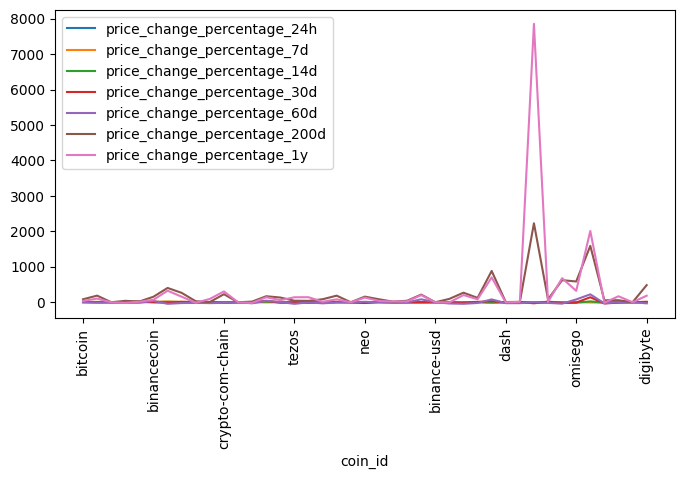

In [21]:
# Plot your data to see what's in your DataFrame
fig, ax = plt.subplots(figsize=(8, 4))
df_market_data.plot.line(ax=ax, rot=90)

plt.show()


---

### Prepare the Data

In [22]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
stock_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']])

In [23]:
# Create a DataFrame with the scaled data
df_stocks_scaled = pd.DataFrame(
    stock_data_scaled,
    columns=['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y'])
# Copy the crypto names from the original data

# Set the coinid column as index
df_stocks_scaled["coin_id"] = df_market_data.index

# Display sample data
df_stocks_scaled = df_stocks_scaled.set_index("coin_id")
df_stocks_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [24]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [25]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_stocks_scaled)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

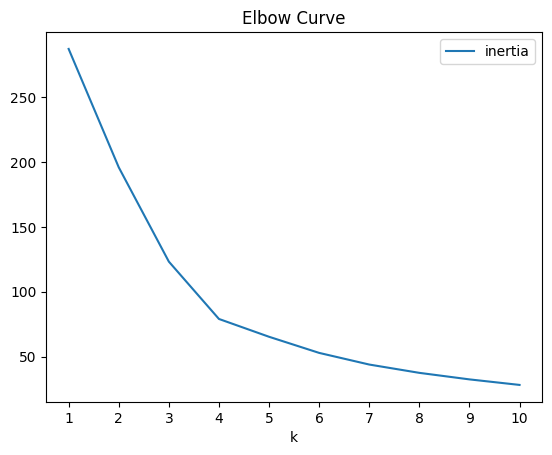

In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The best value for k is four, because it shows the lowest inertia and k numbers.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [29]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [30]:
# Fit the K-Means model using the scaled data
model.fit(df_stocks_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [31]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_stocks_scaled)

# Print the resulting array of cluster values.
kmeans_predictions

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [32]:
# Create a copy of the DataFrame
k_means_segments=df_stocks_scaled.copy()

In [33]:
# Add a new column to the DataFrame with the predicted clusters
k_means_segments['k_mean_segments']=kmeans_predictions

# Display sample data
k_means_segments.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_mean_segments
coin_id,,,,,,,,
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071,3
vechain,0.585089,-0.994231,-2.217108,-0.603898,-0.930423,0.077149,-0.117482,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

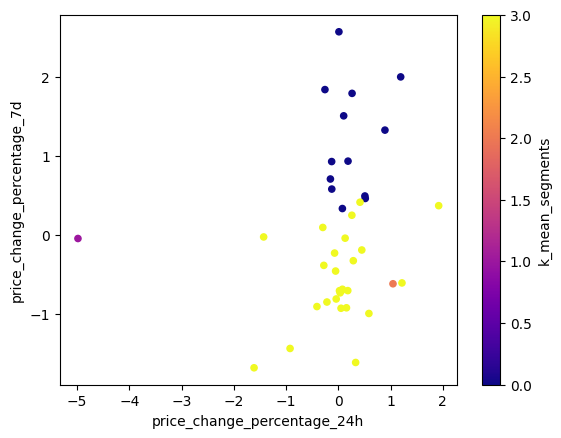

In [34]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
k_means_segments.plot.scatter("price_change_percentage_24h", "price_change_percentage_7d", c='k_mean_segments', cmap='plasma')

---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [37]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
stocks_pca = pca.fit_transform(df_stocks_scaled)
# View the first five rows of the DataFrame.
stocks_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [38]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [39]:
import numpy as np

# Fit the PCA model to your data
pca.fit(df_stocks_scaled)

# Get the loadings (coefficients) for each feature
loadings = pca.components_

# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)

# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)

# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_stocks_scaled.columns[feature_idx]  # Assuming you have column names
    print(f"Component {component+1}: Most important feature is {feature_name}")


Component 1: Most important feature is price_change_percentage_200d
Component 2: Most important feature is price_change_percentage_30d
Component 3: Most important feature is price_change_percentage_7d


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**
The summary of variance is 88%. The price_change_percentage_200d provides 37%, price_change_percentage_30d 34% and price_change_percentage_7d 17%.

In [40]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
pca_df= pd.DataFrame(
    stocks_pca,
    columns=["PCA1", "PCA2","PCA3"]
)

# # Copy the crypto names from the original data
pca_df['coin_id']=df_stocks_scaled.index

# # Display sample data
pca_df = pca_df.set_index("coin_id")
# # Set the coinid column as index


# # Display sample data
pca_df.sample(10)


,PCA1,PCA2,PCA3
coin_id,,,
nem,0.608974,0.563532,-1.148742
eos,-0.693425,-0.473815,-0.527597
havven,0.865762,-2.261882,0.275583
binancecoin,-0.516534,1.388377,0.804071
ripple,-0.471835,-0.222660,-0.479053
cosmos,-0.306272,0.703415,1.714224
maker,-0.389045,0.165041,0.379414
binance-usd,-0.450211,-0.151019,-0.647401
tezos,-0.796176,-0.494409,1.082812


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)
df_elbow_pca.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

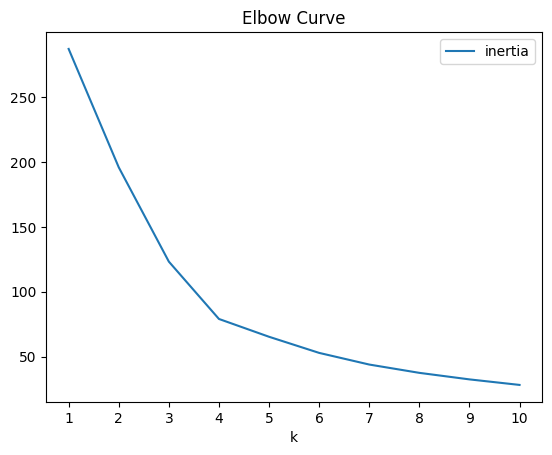

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value is four.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, its the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data
model_pca.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model_pca.predict(pca_df)
# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_predictions_df = pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_predictions_df["stock_segments"] = k_4
# Display sample data
pca_predictions_df.sample(10)

,PCA1,PCA2,PCA3,stock_segments
coin_id,,,,
chainlink,-0.450711,0.517699,2.846143,0
nem,0.608974,0.563532,-1.148742,3
dash,-0.613923,-0.479337,0.339565,3
maker,-0.389045,0.165041,0.379414,0
true-usd,-0.458131,-0.135734,-0.635284,3
omisego,0.111675,0.428316,-1.205398,3
ethlend,8.089018,-3.896891,2.301382,1
tezos,-0.796176,-0.494409,1.082812,0
cosmos,-0.306272,0.703415,1.714224,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

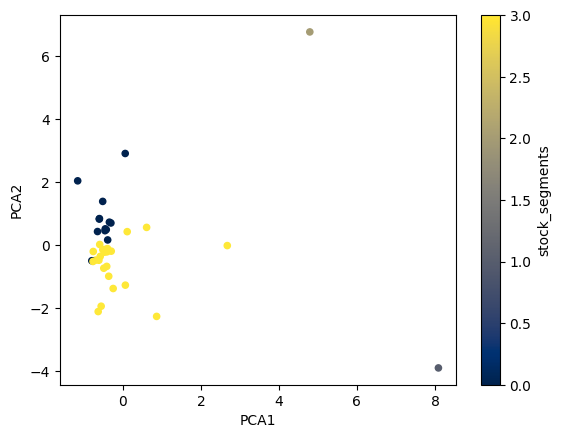

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_predictions_df.plot.scatter("PCA1", "PCA2", c='stock_segments', cmap='cividis')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

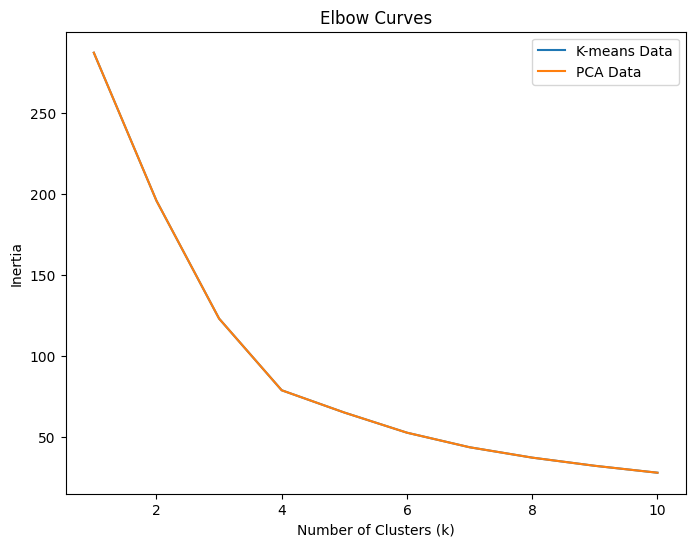

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: df_elbow and df_elbow_pca

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the elbow curve for the original data
ax.plot(df_elbow["k"], df_elbow["inertia"], label="K-means Data")

# Plot the elbow curve for the PCA data
ax.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], label="PCA Data")

# Set the x-axis label, y-axis label, and title
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Inertia")
ax.set_title("Elbow Curves")

# Add a legend
ax.legend()

# Show the plot
plt.show()


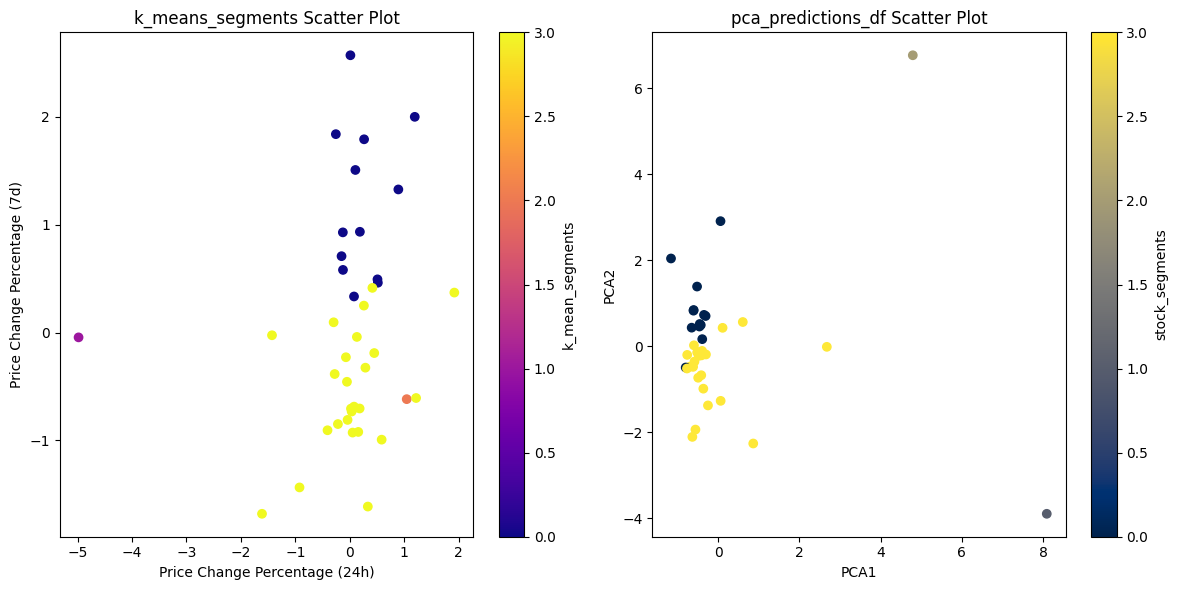

In [ ]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Create a new figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the scatter plot for k_means_segments on the first subplot
scatter1 = axs[0].scatter(k_means_segments["price_change_percentage_24h"], k_means_segments["price_change_percentage_7d"], c=k_means_segments["k_mean_segments"], cmap='plasma')
axs[0].set_xlabel("Price Change Percentage (24h)")
axs[0].set_ylabel("Price Change Percentage (7d)")
axs[0].set_title("k_means_segments Scatter Plot")
colorbar1 = plt.colorbar(scatter1, ax=axs[0])
colorbar1.set_label('k_mean_segments')

# Plot the scatter plot for pca_predictions_df on the second subplot
scatter2 = axs[1].scatter(pca_predictions_df["PCA1"], pca_predictions_df["PCA2"], c=pca_predictions_df["stock_segments"], cmap='cividis')
axs[1].set_xlabel("PCA1")
axs[1].set_ylabel("PCA2")
axs[1].set_title("pca_predictions_df Scatter Plot")
colorbar2 = plt.colorbar(scatter2, ax=axs[1])
colorbar2.set_label('stock_segments')

# Adjust spacing between subplots
plt.tight_layout()

# Show the composite plot
plt.show()


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**